In [25]:
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
tpf = search_targetpixelfile(200008664).download()

In [59]:
tpf

KeplerTargetPixelFile Object (ID: 200008664)

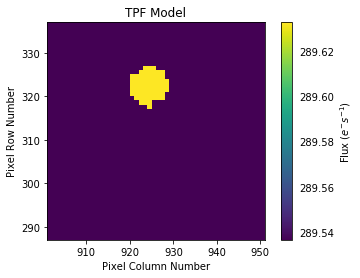

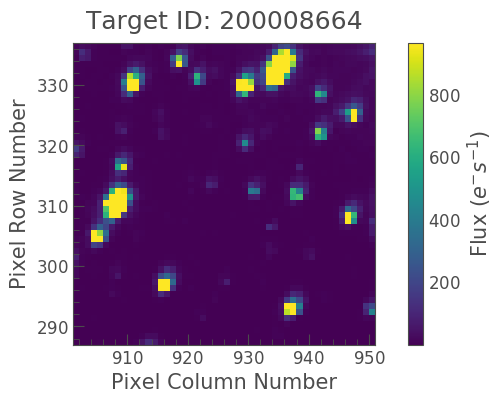

In [66]:
model = tpf.get_model()
model.plot()
tpf.plot()

In [82]:
#931 313
from lightkurve.prf import StarPrior
model.star_priors = [StarPrior(col=GaussianPrior(mean=931, var=1),
                                        row=GaussianPrior(mean=313, var=1),
                                        flux=GaussianPrior(mean=300, var=tpf.flux.std())),
                              StarPrior(col=FixedValuePrior(value=935),
                                        row=FixedValuePrior(value=330),
                                        flux=GaussianPrior(mean=150000, var=tpf.flux.std()))]
model.star_priors

[<StarPrior(
   col=<GaussianPrior(mean=[931], var=[1])>
   row=<GaussianPrior(mean=[313], var=[1])>
   flux=<GaussianPrior(mean=[3], var=[1615.9711])>
   targetid=None)>, <StarPrior(
   col=<FixedValuePrior(value=[935])>
   row=<FixedValuePrior(value=[330])>
   flux=<GaussianPrior(mean=[150000], var=[1615.9711])>
   targetid=None)>]

In [83]:
#931 313
from lightkurve.prf import BackgroundPrior
model.background_prior = BackgroundPrior(flux=GaussianPrior(mean=tpf.flux.mean(), var=tpf.flux.std()))
model.motion_prior

<MotionPrior(
  shift_col=<GaussianPrior(mean=[0], var=[1.])>
  shift_row=<GaussianPrior(mean=[0], var=[1.])>)>

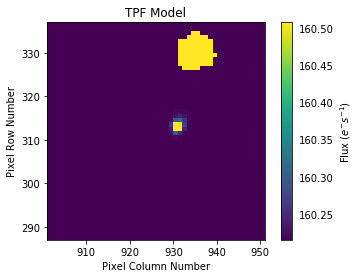

In [84]:
from lightkurve.prf import TPFModel, StarPrior, BackgroundPrior, FocusPrior, MotionPrior
from lightkurve.prf import GaussianPrior, UniformPrior, FixedValuePrior

model.plot()

In [72]:
tpf.flux.std()

1615.9711

# deprecated part

In [ ]:
# from lightkurve import PRFPhotometry
# prfphot = PRFPhotometry(model=model)
# prfphot.run(tpf.flux + tpf.flux_bkg)

In [39]:
from astropy.io import fits
hdul = fits.open('ktwo200008664-c05_lpd-targ.fits')
hdulist = fits.HDUList(hdul[2])
hdul

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f87f018db38>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f87f22fa048>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f87f0190f98>]

In [13]:
from astropy.coordinates import SkyCoord

In [35]:
from lightkurve.targetpixelfile import KeplerTargetPixelFile as KTPF

In [36]:
tpf = KTPF.from_fits_images(['ktwo200008664-c05_lpd-targ.fits'],
                            SkyCoord(132.77649130787, 11.90521439453, unit='deg'),
                            size=(4,4))

AttributeError: 'BinTableHDU' object has no attribute 'keys'

In [34]:
ntpf = KTPF(tpf.time, tpf.flux[:,25:27,29:31])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
tpf.xlus